# scaling

In [ ]:
# 요약
# 데이터 encoding 완료 후 진행해야 함
# 스케일링 4가지 중 어떤 것 사용할지 고민해보기 -> 스케일링 4가지 모두 모델에 학습시켜서 성능이 가장 좋은 것 적용

In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

In [4]:
# 데이터 지은언니 0615버전 데이터 (데이터 encoding 완료 후 진행해야 함)

train = pd.read_csv('../../ieee-fraud-detection/0615_train_pp_ver1.csv')
test =pd.read_csv('../../ieee-fraud-detection/0615_test_pp_ver1.csv')

In [5]:
class MultiColLabelEncoder:
    def __init__(self):
        self.encoder_dict = defaultdict(LabelEncoder)

    def fit_transform(self, X: pd.DataFrame, columns: list):  # 컬럼명 리스트 기준으로 레이블인코딩
        if not isinstance(columns, list):
            columns = [columns]

        output = X.copy()
        output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].fit_transform(x))

        return output

    def inverse_transform(self, X: pd.DataFrame, columns: list):  # 인코딩 된 열 레이블 복구
        if not isinstance(columns, list):
            columns = [columns]

        if not all(key in self.encoder_dict for key in columns):
            raise KeyError(f'At least one of {columns} is not encoded before')

        output = X.copy()
        try:
            output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].inverse_transform(x))
        except ValueError:
            print(f'Need assignment when do "fit_transform" function')
            raise

        return output

In [6]:
# encoding
cat_cols = ["ProductCD", "card1", "card2", "card3", "card4", "card5", "card6", "addr1", "addr2", "P_emaildomain", 
            "R_emaildomain", "M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9"]
train_encoded = MultiColLabelEncoder().fit_transform(train, columns=cat_cols)
train_encoded

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,M3,M4,M5,M6,M7,M8,M9,PC1,PC2,PC3
0,2987000,0.0,86400,68.50,4,10095,500,42,1,38,...,1,2,0,1,2,2,2,-414.605554,-99.819259,100.066514
1,2987001,0.0,86401,29.00,4,1372,303,42,2,2,...,2,0,1,1,2,2,2,-581.849403,-115.593458,-18.591293
2,2987002,0.0,86469,59.00,4,2833,389,42,3,58,...,1,0,0,0,0,0,0,-581.849421,-115.593437,-18.591291
3,2987003,0.0,86499,50.00,4,13341,466,42,2,14,...,2,0,1,0,2,2,2,2675.079606,77.806453,998.550570
4,2987004,0.0,86506,50.00,1,2712,413,42,2,2,...,2,3,2,2,2,2,2,-581.849185,-115.593577,-18.591272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0.0,15811047,49.00,4,4305,500,42,3,108,...,1,0,1,0,0,0,1,-543.343239,-96.650015,-2.084821
590536,3577536,0.0,15811049,39.50,4,7354,124,42,2,106,...,0,0,0,1,0,0,0,-581.849421,-115.593437,-18.591291
590537,3577537,0.0,15811079,30.95,4,8621,494,42,2,106,...,0,3,2,1,2,2,2,-581.849441,-115.593445,-18.591311
590538,3577538,0.0,15811088,117.00,4,5297,380,42,2,106,...,1,0,0,1,2,2,2,2175.884363,1163.337741,2170.418130


In [7]:
# 데이터 분할
X = train_encoded.drop(['isFraud'], axis = 1)
Y = train_encoded['isFraud']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [8]:
# data scailing
# fit은 스케일링의 기준을 세우며 변환하는 기능, transform은 기준에 따라 변환만 하는 기능
# 따라서 훈련데이터에는 fit_transform()함수를, 평가 데이터에는 transform()함수를 사용

In [9]:
# Standard Scaler(이상치에 민감, 각 피쳐의 평균을 0 분산을 1로 조정, 모든 특성들이 같은 스케일을 갖게 됨, 단위가 서로 다른 특성의 변화를 비교할 때 사용)
from sklearn.preprocessing import StandardScaler

# 스케일링 실행
scaler_s = StandardScaler()
X_train_scaled_s = scaler_s.fit_transform(X_train)
X_test_scaled_s = scaler_s.transform(X_test)

# 배열형태로 변환되기 때문에 데이터 프레임 형태로 변환
X_train_scaled_DF_s = pd.DataFrame(data = X_train_scaled_s, columns = X_train.columns)
X_test_scaled_DF_s = pd.DataFrame(data = X_test_scaled_s, columns = X_test.columns)

# 스케일링 전 후 비교
print('feature 평균')
print(X_train_scaled_DF_s.mean())
print('\nfeature 분산')
print(X_train_scaled_DF_s.var())
print('##############')
print(X_train.head(5))
print(X_train_scaled_DF_s.head(5))

feature 평균
TransactionID    -8.830387e-16
TransactionDT     6.338903e-17
TransactionAmt   -2.392620e-16
ProductCD        -7.979679e-17
card1             2.987968e-17
card2             4.203409e-17
card3             2.607754e-17
card4            -3.183369e-16
card5            -5.634826e-17
card6             1.722353e-16
addr1             1.086898e-16
addr2             3.067379e-16
dist1             7.824005e-18
dist2             3.202347e-17
P_emaildomain    -5.375935e-17
R_emaildomain    -5.965909e-17
C3                9.986630e-19
C5               -5.719251e-18
C9                2.257219e-17
C13              -1.882620e-17
D1               -2.924468e-17
D2                1.886073e-17
D3               -3.035976e-17
D10               1.636160e-17
D11              -4.283127e-17
D15              -4.982140e-17
M1               -1.382246e-16
M2                4.491176e-17
M3                4.054612e-17
M4                7.583422e-17
M5               -6.696256e-17
M6                4.795989e-

In [10]:
# Robust Scaler(모든 특성들이 같은 크기를 갖음, 이상치에 영향을 받지 않음, 평균과 분산대신 median과 quartile을 사용, 서로 다른 단위를 통일 시킬 때 사용)
from sklearn.preprocessing import RobustScaler

# 스케일링 실행
scaler_r = RobustScaler()
X_train_scaled_r = scaler_r.fit_transform(X_train)
X_test_scaled_r = scaler_r.transform(X_test)

# 배열형태로 변환되기 때문에 데이터 프레임 형태로 변환
X_train_scaled_DF_r = pd.DataFrame(data = X_train_scaled_r, columns = X_train.columns)
X_test_scaled_DF_r = pd.DataFrame(data = X_test_scaled_r, columns = X_test.columns)

# 스케일링 전 후 비교
print('feature 특징')
print(X_train_scaled_DF_r.describe())
print('##############')
print(X_train.head(5))
print(X_train_scaled_DF_r.head(5))

feature 특징
       TransactionID  TransactionDT  TransactionAmt      ProductCD  \
count  442905.000000  442905.000000   442905.000000  442905.000000   
mean        0.000791       0.011310        0.808172      -0.778880   
std         0.577063       0.560965        2.945692       1.423551   
min        -0.998352      -0.873535       -0.836904      -4.000000   
25%        -0.498930      -0.516432       -0.314907      -1.000000   
50%         0.000000       0.000000        0.000000       0.000000   
75%         0.501070       0.483568        0.685093       0.000000   
max         1.000464       1.036713      388.811478       0.000000   

               card1          card2          card3          card4  \
count  442905.000000  442905.000000  442905.000000  442905.000000   
mean        0.028193       0.017059       2.998530      -0.382992   
std         0.596667       0.532600      10.611621       0.591158   
min        -1.053371      -0.869565     -42.000000      -3.000000   
25%        -0

In [11]:
# MinMax Scaler(모든 피쳐가 0과 1사이로 조정, 데이터가 2차원 셋일 경우 모든 데이터는 x축과 y축의 각각 0과 1사이에 위치)
from sklearn.preprocessing import MinMaxScaler

# 스케일링 실행
scaler_m = MinMaxScaler()
X_train_scaled_m = scaler_m.fit_transform(X_train)
X_test_scaled_m = scaler_m.transform(X_test)

# 배열형태로 변환되기 때문에 데이터 프레임 형태로 변환
X_train_scaled_DF_m = pd.DataFrame(data = X_train_scaled_m, columns = X_train.columns)
X_test_scaled_DF_m = pd.DataFrame(data = X_test_scaled_m, columns = X_test.columns)

# 스케일링 전 후 비교
print('feature 최솟값')
print(X_train_scaled_DF_m.min())
print('fearure 최댓값')
print(X_train_scaled_DF_m.max())
print('##############')
print(X_train.head(5))
print(X_train_scaled_DF_m.head(5))

feature 최솟값
TransactionID     0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
card1             0.0
card2             0.0
card3             0.0
card4             0.0
card5             0.0
card6             0.0
addr1             0.0
addr2             0.0
dist1             0.0
dist2             0.0
P_emaildomain     0.0
R_emaildomain     0.0
C3                0.0
C5                0.0
C9                0.0
C13               0.0
D1                0.0
D2                0.0
D3                0.0
D10               0.0
D11               0.0
D15               0.0
M1                0.0
M2                0.0
M3                0.0
M4                0.0
M5                0.0
M6                0.0
M7                0.0
M8                0.0
M9                0.0
PC1               0.0
PC2               0.0
PC3               0.0
dtype: float64
fearure 최댓값
TransactionID     1.0
TransactionDT     1.0
TransactionAmt    1.0
ProductCD         1.0
card1             1.0
card2          

In [74]:
# Normalizer Scaler(row마다 각각 정규화, 유클리드 거리가 1이 되더록 데이터 조정, 좀 더 빠르게 학습 가능, 과대적합 확률 낮춤)

from sklearn.preprocessing import Normalizer

# NaN값 일단 0으로 처리 후 돌리기!
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# 스케일링 실행
scaler_n = Normalizer()
X_train_scaled_n = scaler_n.fit_transform(X_train)
X_test_scaled_n = scaler_n.transform(X_test)

# 배열형태로 변환되기 때문에 데이터 프레임 형태로 변환
X_train_scaled_DF_n = pd.DataFrame(data = X_train_scaled_n, columns = X_train.columns)
X_test_scaled_DF_n = pd.DataFrame(data = X_test_scaled_n, columns = X_test.columns)

# 스케일링 전 후 비교
print(X_train.head(5))
print(X_train_scaled_DF_n.head(5))

        TransactionID  TransactionDT  TransactionAmt  ProductCD  card1  card2  \
237180        3224180        5603802           57.95          4   1092    259   
339222        3326222        8357884           97.95          4   7147    316   
133971        3120971        2672178          947.00          4  11289    389   
154300        3141300        3190087           77.95          4  13433    259   
194224        3181224        4379168          475.95          4  10984    209   

        card3  card4  card5  card6  ...  M3  M4  M5  M6  M7  M8  M9  \
237180     42      2     58      2  ...   1   3   2   0   1   1   1   
339222     42      3    108      2  ...   1   3   2   1   0   0   1   
133971     42      3    108      2  ...   1   0   1   1   2   2   2   
154300     42      2     58      2  ...   1   3   2   1   0   0   1   
194224     42      2    106      2  ...   1   3   2   1   0   0   1   

               PC1         PC2        PC3  
237180 -581.790659 -115.507571 -18.497199 

# PCA

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

train_encoded = MultiColLabelEncoder().fit_transform(train, columns=cat_cols)

# 일단 임시로 0으로 채움
train_encoded = train_encoded.fillna(0)

X = train_encoded.drop(['isFraud'], axis = 1)
Y = train_encoded['isFraud']
x_std = StandardScaler().fit_transform(X)

In [69]:
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

/Users/krc/miniforge3/envs/seyi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


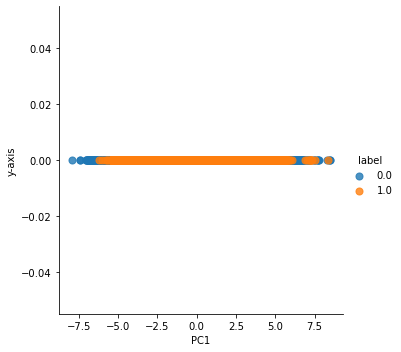

In [70]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False, 
          scatter_kws={"s":50}, hue='label');

# 요약

In [ ]:
# PCA가 모델의 성능을 높여주는 것은 아니다. 하지만, 빠르게 필요 없는 feature들을 없애고 핵심적인 feature 들만을 뽑아서 모델을 만드는 것에는 유용